<a href="https://colab.research.google.com/github/palnitin12345/Cardio-Vascular-Disease-Prediction/blob/main/Capstone_Classification_CardiovascularHealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Cardiovascular Risk Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1** - Shristhi Patel
##### **Team Member 2** - Nitin Pal


# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


Cardiovascular disease is one of the most prevalent chronic diseases and the leading cause of death in the United States. Every year about 1 million Americans die due to cardiovascular related problems, which is about 42% of total death per year. Cardiovascular disease is the disease of heart and vascular system of the human body that includes narrowing down or blocking of blood vessels (arteries, veins and capillaries) that can lead to range of diseases such as coronary artery disease, arrhythmia, congenital heart defects, angina (chest pain) and stroke.

> 


So if the cardiovascular diseases can be predicted then we'd be able to save a million of people around the world.  

#### **Define Your Business Objective?** 

***Reducing risk of cardiovascular diseases***

#GitHub Link

https://github.com/palnitin12345/Cardio-Vascular-Disease-Prediction.git

# Let's begin

## ***1. Know Your Data***

In [4]:
#Importing required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from numpy import math
from scipy import stats

!pip install squarify
import squarify

import datetime
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Importing packages to split data into train and test
from sklearn.model_selection import train_test_split
     

# Libraries for modelling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Importing libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
     

import requests
import io
 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Downloading the csv file from your GitHub account

url = "https://raw.githubusercontent.com/palnitin12345/Cardio-Vascular-Disease-Prediction/main/data_cardiovascular_risk.csv"
 # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

dataset = pd.read_csv(io.StringIO(download.decode('utf-8')))


In [6]:
#First look of the data.

dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [7]:
# Dataset Rows & Columns count

print(f'Shape of first dataset {dataset.shape}')

Shape of first dataset (3390, 17)


In [8]:
#Dataset info
#Looking the datatypes

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

Duplicate Values

In [9]:

#Number of duplicated Rows

len(dataset[dataset.duplicated()])

0

Missing/Null Values

In [10]:
#Finding null columns in the dataset and percentage of null values.
print("Col     Null values percent")
for col in dataset.columns:
  if dataset[col].notnull().sum() != len(dataset):
    print(f"{col}  :- {round(dataset[col].isnull().sum()*100/len(dataset),2)}")

Col     Null values percent
education  :- 2.57
cigsPerDay  :- 0.65
BPMeds  :- 1.3
totChol  :- 1.12
BMI  :- 0.41
heartRate  :- 0.03
glucose  :- 8.97


### What did you know about your dataset?

We got to know that we have data 3390 patients whose heart rate, cholestrol level and other parameters are given. And we have to predict whether they possess a risk of Cardiovascular heart Diseases in the next ten years or not. 
There are no columns with more than 3% of null values, so they can be treated and no need to remove columns. There are no duplicated entries in the dataset.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns

dataset.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
# Dataset Describe

dataset.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


Variables Description 

1.  **id** :-  Unique id referring to a patient case
2.  **age** :- Age of the person
3.  **education** :- Describes their education level.
4.	**sex**:- Gender of the patient
5.	**is_smoking**:- whether the person smokes or not
6.	**cigsPerDay**:- number of ciggerattes consumed in a day
7.	**BPMeds**:- whether taking blood pressure meds or not
8.	**prevalentStroke**:- Whether patient has a history of stroke
9.	**prevalentHyp**:-whether patient has a history of hypertension
10.	**diabetes**:- whether patient has diabetes or not
11.	**totChol**:-Cholestrol level of the pateint
12.	**sysBP**	:-systolic blood pressure value
13. **diaBP**:-diastolic blood pressure value
14.	**BMI**:- Body Mass Index. Refers to general physique of the person
15.	**heartRate**:- Heart rate 
16.	**glucose**:-Glucose level in the person's body
17.	**TenYearCHD**:- Whether there are chances of cardiovascular Heart Disease or not

Unique Values

In [13]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),)

No. of unique values in  id is 3390
No. of unique values in  age is 39
No. of unique values in  education is 4
No. of unique values in  sex is 2
No. of unique values in  is_smoking is 2
No. of unique values in  cigsPerDay is 32
No. of unique values in  BPMeds is 2
No. of unique values in  prevalentStroke is 2
No. of unique values in  prevalentHyp is 2
No. of unique values in  diabetes is 2
No. of unique values in  totChol is 240
No. of unique values in  sysBP is 226
No. of unique values in  diaBP is 142
No. of unique values in  BMI is 1259
No. of unique values in  heartRate is 68
No. of unique values in  glucose is 132
No. of unique values in  TenYearCHD is 2


In [14]:
#Columns that are categorical in nature

for col in dataset.columns:
  if dataset[col].nunique()<=10:
    print(col)
    print(dataset[col].value_counts())
    print('')

education
1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

sex
F    1923
M    1467
Name: sex, dtype: int64

is_smoking
NO     1703
YES    1687
Name: is_smoking, dtype: int64

BPMeds
0.0    3246
1.0     100
Name: BPMeds, dtype: int64

prevalentStroke
0    3368
1      22
Name: prevalentStroke, dtype: int64

prevalentHyp
0    2321
1    1069
Name: prevalentHyp, dtype: int64

diabetes
0    3303
1      87
Name: diabetes, dtype: int64

TenYearCHD
0    2879
1     511
Name: TenYearCHD, dtype: int64



##***3. Data Wrangling***


The above dataframe explains the effect of removal of outliers. If the outliers in this particular case are removed, it would cause removal of many rows with possible risk of CHD.
 In this scenario, it is known that people with extreme values of Cholestrol, BP, Glucose, BMI etc. are prone to heart diseases. Hence, removal of higher numbers is not considered.

In [15]:
dataset['is_smoking'] =dataset['is_smoking'].map({'YES':1,'NO':0})


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***



###Chart 1: Ten Year CHD (Univariate)

0    2879
1     511
Name: TenYearCHD, dtype: int64
 


<Axes: ylabel='TenYearCHD'>

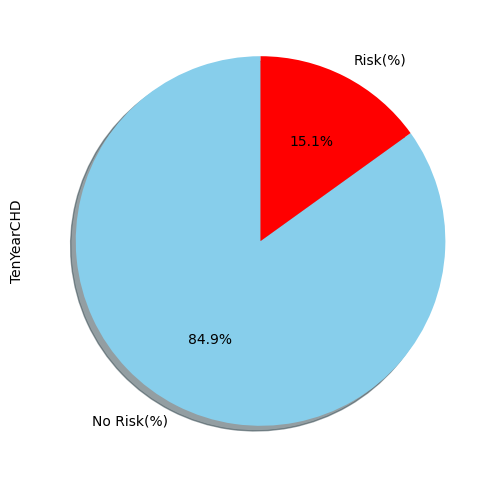

In [16]:
# Chart - 1 visualization code

# Dependent Column Value Counts
print(dataset['TenYearCHD'].value_counts())
print(" ")
# Dependent Variable Column Visualization

dataset['TenYearCHD'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No Risk(%)','Risk(%)'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

 1. Why did you pick the specific chart?

Pie chart is an easy way to present the percentage of every case possible in a situation. Like in the above graph pie chart shows very clear distinction between the two cases, Rish of CHD and No risk of CHD. That's why I used the pie chart.

2. What is/are the insight(s) found from the chart?

From the above chart, we got to know that there are 2879 persons which have no risk of cardiovascular heart disease in the next 10 years. They constitute about 85% of the whole while the other 15%(511 persons) are in risk category. So they should take care of their health more.

3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Predicting CHD 10 years before can save a million of lives per year. A data scientist not being a doctor can still be able to save lives with the help of past data.This prediction can give a boom in the business as if we can predict the next ten years then the hospitals can provide a routine/regime by which the patients can tackle the heart problems or reduce it by a great factor.This can increase medicine sales and can increase fee of the doctor which helps hospitals to retain a patient for longer duration.



###Chart 2: Age VS CHD Risk (Bivariate)

   age  Average Risk of CHD %
0   70              50.000000
1   68              50.000000
2   66              46.666667
3   65              37.209302
4   67              33.333333
5   63              30.107527
6   60              25.263158
7   62              25.000000
8   58              24.210526
9   61              24.137931
 


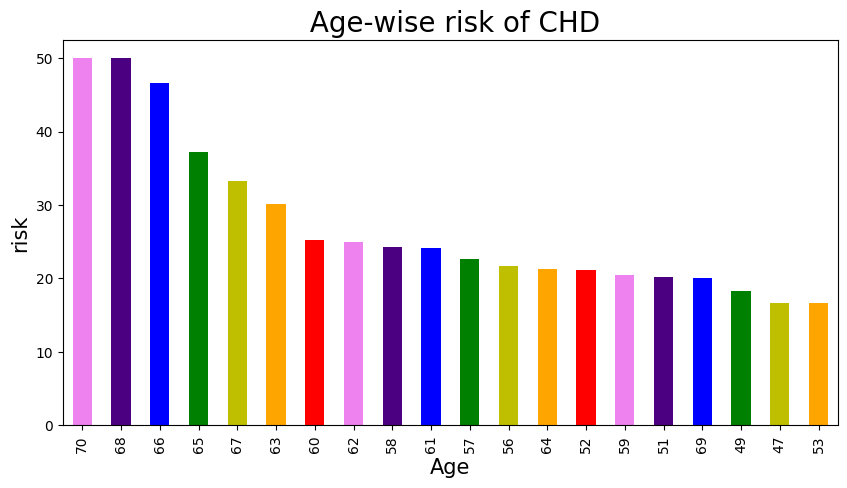

In [17]:
# Chart - 2 visualization code

print((dataset.groupby(['age'])['TenYearCHD'].mean()*100).sort_values(ascending = False).reset_index(name="Average Risk of CHD %").head(10))
print(" ")

#Showing ages when risk of CHD is maximum.

plt.rcParams['figure.figsize'] = (10, 5)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((dataset.groupby(['age'])['TenYearCHD'].mean())*100).sort_values(ascending = False).head(20).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" Age-wise risk of CHD", fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('risk', fontsize = 15)
plt.show()

 1. Why did you pick the specific chart?

We have chosen bar chart becuase it distinctly depicts the comparison of one age with another. We get a very clear idea of the difference between two classes in a bar chart.

2. What is/are the insight(s) found from the chart?

People with age above 66 years have high chances of CHD in next ten years. While for the other age groups it is comparatively low. 

3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The business can provide people of age greater than 66 more care and their continuous health check to keep them away from CHD. The ages which have moderate risk percent can be warned and advised for lifestyle modifications to very high risk in later age.
And the people with very low risk can be appreciated in some ways to motivate them to keep up their good lifestyle. These all things take tiime and resources which a business can provide and this can increase their business positively.

And if a business ignores the high risk aged people, this can result in very unfortunate situations like heart attack and can negatively affect business. 

###Chart 3:Gender VS CHD Risk 

In [18]:
#Making a dataset who have risk of CHD in next ten years

dataset_chd_risk = dataset[dataset['TenYearCHD']==1]

M    272
F    239
Name: sex, dtype: int64
 


<Axes: ylabel='sex'>

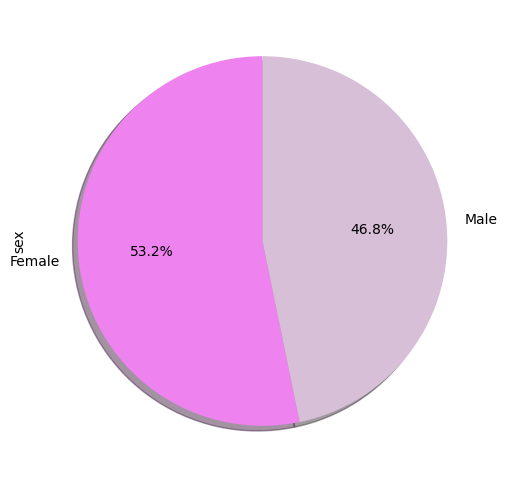

In [19]:
# Chart - 3 visualization code

# Risk of CHD for different genders

print(dataset_chd_risk['sex'].value_counts())
print(" ")

#Plotting

dataset_chd_risk['sex'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Female','Male'],
                               colors=['violet','thistle'],
                               explode=[0,0]
                              )

 1. Why did you pick the specific chart?

We picked this pie chart becuase it shows clear differentitation in the percentages of the cases it is given. 

2. What is/are the insight(s) found from the chart?

We found here that Females have more chances of getting risk of CHD in next ten years in comparison to men.  

3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above insights can be used in business to create awareness among women for more regulary heart helath checkups. More care towards females could lead to positive business impact.

###Chart 4: Education And CHD Risk

   education  Average Risk of CHD %
0        1.0              18.404026
1        4.0              14.477212
2        3.0              12.750455
3        2.0              11.919192
 


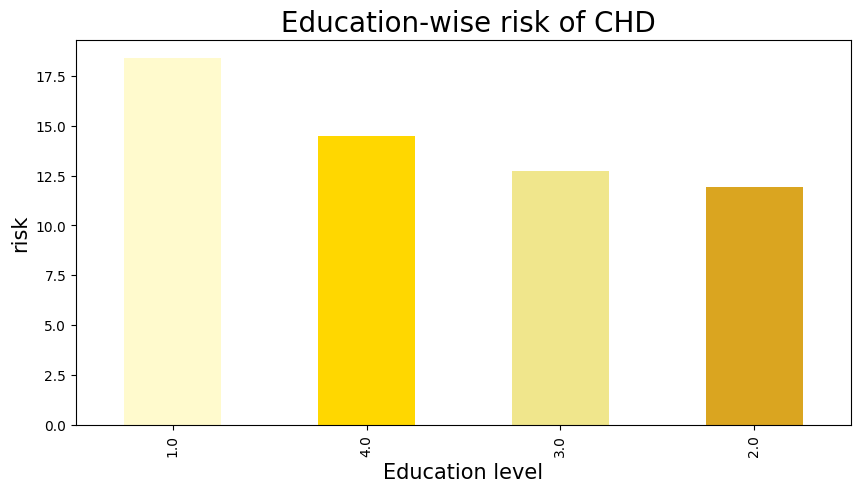

In [20]:
# Chart - 4 visualization code

print((dataset.groupby(['education'])['TenYearCHD'].mean()*100).sort_values(ascending = False).reset_index(name="Average Risk of CHD %").head(10))
print(" ")

#Which education group has less risk of CHD.

plt.rcParams['figure.figsize'] = (10, 5)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((dataset.groupby(['education'])['TenYearCHD'].mean())*100).sort_values(ascending = False).head(20).plot.bar(color = ['lemonchiffon','gold','khaki','goldenrod'])
plt.title(" Education-wise risk of CHD", fontsize = 20)
plt.xlabel('Education level', fontsize = 15)
plt.ylabel('risk', fontsize = 15)
plt.show()

 1. Why did you pick the specific chart?

Bar chart is very helpful in showing the difference in the classes of a categorical variable. That is why we used this specific bar chart here.

2. What is/are the insight(s) found from the chart?

From the above chart we found that the people who have lowest education level have the hightest risk of CHD. This can be accounted by lack of awareness. The less eeducated people might not have adequate knowledge in undrstanding why heart diseases happens and what lifestyle they should adopt.
The people who have highest education level also has high risk. This can be accounted by their negligience to their health and focusing more in their work. 

3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

To get a positive growth in business we can create awareness in the less educated group so that they can take care of themselves in thier house and can judge by themselves when they should consult a doctor.
And for the people with high education level, they can conduct regular sessions for getting their health checkup to reduce the risk. By maintaining these programs a business can grow in sales and promotion.

###Chart 5: Other Diseases and CHD Risk

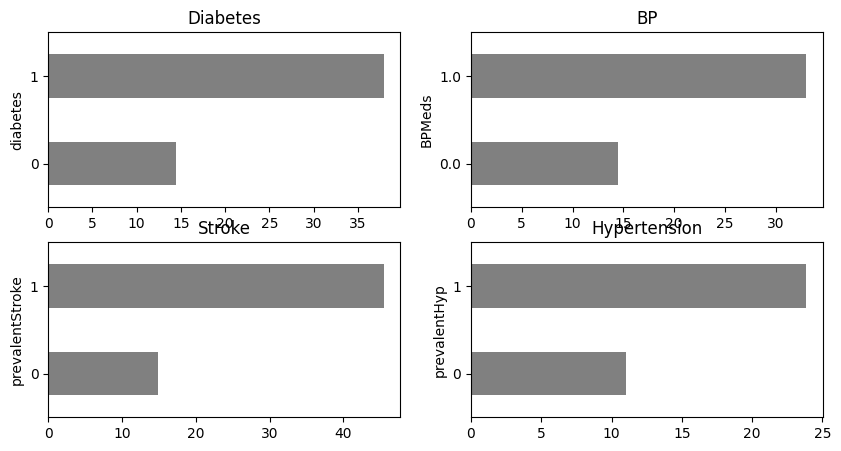

In [21]:
#Chart 5 - visualization code

plt.subplot(2, 2, 2)
(dataset.groupby("BPMeds")["TenYearCHD"].mean()*100).plot(kind='barh', color='grey')
plt.title('BP')

plt.subplot(2, 2, 3)
(dataset.groupby("prevalentStroke")["TenYearCHD"].mean()*100).plot(kind='barh',color='grey')
plt.title('Stroke')

plt.subplot(2, 2, 4)
(dataset.groupby("prevalentHyp")["TenYearCHD"].mean()*100).plot(kind='barh',color = 'grey')
plt.title('Hypertension')

plt.subplot(2, 2, 1)
(dataset.groupby("diabetes")["TenYearCHD"].mean()*100).plot(kind='barh',color = 'grey')
plt.title('Diabetes')

plt.show()

 1. Why did you pick the specific chart?

We have used horizontal bar graphs because the labels are easier to display. In addition, they are more suitable for display on a small space in the case of a large data set.
A horizontal bar chart is a graph in the form of rectangular bars.
The length of these bars is proportional to the values they represent. The vertical axis represents the categories being compared, while the horizontal axis represents a value.


2. What is/are the insight(s) found from the chart?

We have found that the patients having either one of the above four conditions have more risk of CHD in next ten years. The difference in each of the cases is quite big. So any of the above problems cannot be ignored.

3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above insights can be helpful as if a patient has these problems then those problems should be treated as soon as possible. The presence of more than one of these prblems can increase the risk by a great value. So to create a positive business impact in busness, the hospitals should focus on treating these problems first.

###Chart 6: Smoking affects Heart

<Axes: ylabel='TenYearCHD'>

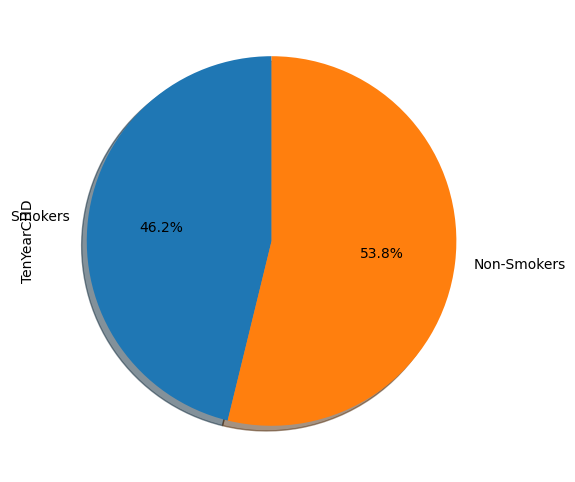

In [22]:
#Chart 6 - visualization code

plt.figure(figsize=(6,5))
(dataset.groupby("is_smoking")["TenYearCHD"].sum()).plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Smokers','Non-Smokers']
                              )

 1. Why did you pick the specific chart?

We have used pie chart to show the percentage differences between who have high risk of CHD due to smoking. Pie chart is used to show the percenatge difference between two or more categories.

2. What is/are the insight(s) found from the chart?

We can see from the above graph that people who smoke has a slightly higher risk of heart diseases. The difference is not big it is around 2% but with age it can be 20% which could be lethal at a later age. 

3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights can help in making a positive impact in business. So we found that smoking is not good for heart health, then the hospitals can provide smoking patients campaigns and advises to help leave smoking and imprive their health. Smoking in general is also bad for respiratory disease and this can also decline the health of a patient. So the hospitals can make money as well as improve the heath of their patients by engaging people in health programs showing downside of smoking. 

###Chart 7: Number of Ciggerattes and CHD

Text(0.5, 1.0, 'Average ciggerattes a day')

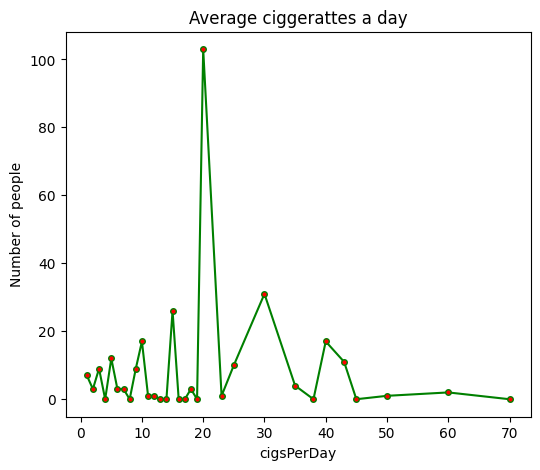

In [23]:
#Chart 7 - visualization code

#This will tell on an average how many are consuming how much cigs per day

plt.figure(figsize=(6,5))
((dataset.groupby(['cigsPerDay'])["TenYearCHD"].sum()).sort_index()[1:]).plot(kind='line',color = 'green',
         linestyle = 'solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4)
plt.ylabel("Number of people")
plt.title("Average ciggerattes a day")

 1. Why did you pick the specific chart?

Here we used a line chart or line plot becuase it connects a series of data points using a line. This chart type helps to indentify trends and we can also predict values if the values follow a sequential pattern.

2. What is/are the insight(s) found from the chart?

Here we found that most of the people who smokes, smokes around 20 ciggerattes in a day. This a very high number as it definitely will have adverse effects on the respiratory system. And also this effects the surrounding people as passive smoking is also harmful.
Most of the people falls in the range of 10 and 40 smokes per day.

3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Business can make profit by advising/refering these people who smokes heavily to an addiction-free program or can refer them to a respiratory disease doctor. This way they can make money and help the society at the same time.

###Chart 8: SysBP related to DiaBP?

<Figure size 600x500 with 0 Axes>

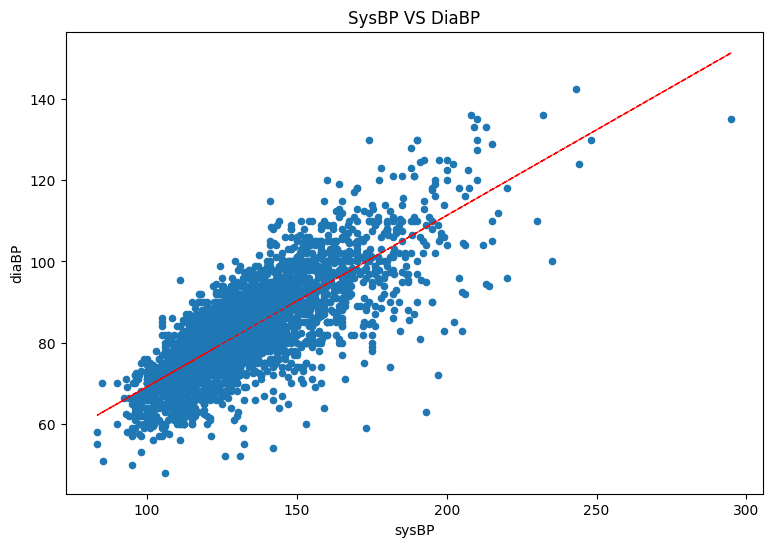

In [24]:
#Chart 8 - visualization code

#Whether there exist a linear relationship between sysBP and diaBP

plt.figure(figsize=(6,5))
dataset.plot(kind="scatter", x="sysBP",y="diaBP",title="SysBP VS DiaBP",figsize=(9,6))
z = np.polyfit(dataset['sysBP'], dataset['diaBP'], 1)
y_hat = np.poly1d(z)(dataset['sysBP'])
plt.plot(dataset['sysBP'], y_hat, "r--", lw=1)
plt.show()

 1. Why did you pick the specific chart?

We have used this plot because scatter plots represent relationships between two numerica vairbales in a better way. The dots in a scatter plot represents the values and slo the patterns when the data are taken as a whole. We can easily identify correlational relationships with this kind of plot.

2. What is/are the insight(s) found from the chart?

We can see that there exists a linear relationship between sysBP and diaBP. It is not perfectly linear. the slight irregularities can be due to high/low blood pressure problems. The range of these both categories is fixed that's why the points are accumulated in a specific area. 

3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The linearity of sysBP and diaBP can be very useful. Proper monitoring of one can predict the other one. And if irregularities can also be added in the model, then we can predict high and low BP. This can be very helpful for business growth.

###Chart 9: BMI vs CHD

In [25]:
#Which BMI range people have more risk of CHD


1. If your BMI is less than 18.5, it falls within the underweight range.
2. If your BMI is 18.5 to <25, it falls within the healthy weight range.
3. If your BMI is 25.0 to <30, it falls within the overweight range.
4. If your BMI is 30.0 or higher, it falls within the obesity range.
Obesity is frequently subdivided into categories:

* Class 1: BMI of 30 to < 35, “low” obesity.
* Class 2: BMI of 35 to < 40, “moderate” obesity.
* Class 3: BMI of 40 or higher, “severe” obesity.



In [26]:
def bmi_cat(x):
  y=''
  if x < 18.5:
    y = 'Underweight'
  elif 18.5 <= x < 25:
    y = 'Healthy'
  elif 25 <= x < 30:
    y = 'Overweight'
  elif 30 <= x <35:
    y = 'Low Obese'
  elif 35 <= x < 40:
    y = 'Moderate obese'
  elif x >= 40:
    y = 'Severe obese'
  return y      

dataset['BMI_cat'] = dataset['BMI'].apply(bmi_cat)

<Axes: xlabel='BMI_cat'>

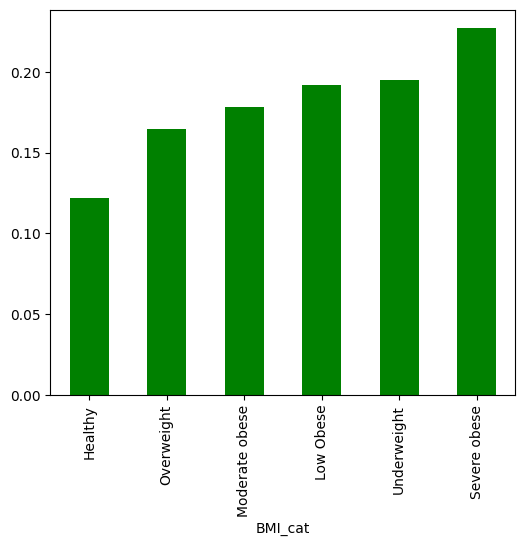

In [27]:
#Chart 9 - visualization code

plt.figure(figsize=(6,5))
(dataset.groupby("BMI_cat")["TenYearCHD"].mean().sort_values()[:6]).plot(kind='bar', color = 'green')

 1. Why did you pick the specific chart?

To show clear distinction between all the classes of BMI, I used this chart. The height of a bar can give a good idea about how value does a class hold.

2. What is/are the insight(s) found from the chart?

We have found that healthy people have the lowest risk of CHD while patients who are obese have maximum risk of getting CHD in next 10 years.
These results are quite obvious as BMI tells the ration of height and weight and signifies about the health of a person. If a person is healthy implies his heart will also be healthy which in turns lowers the heart related problems. And the obese people have quite the opposite thing. They have high risk because of fat concentration.

3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can promote being healthy in the society to lower the risk. Hospitals can provide and advise people to continuously exercise and maintain their body. Daily online yog, exercise classes will be very helpful. This can increase the business as the people will be more engaged and can earn some sales from online classes as suggested. 

###Chart 10: Heart Rate and CHD

<Axes: xlabel='heartRate'>

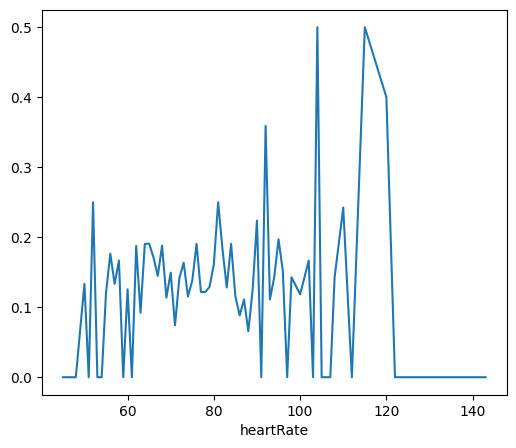

In [28]:
#Chart 10 - visualization code

#High heart rate can lead to CHD?

plt.figure(figsize=(6,5))
((dataset.groupby(['heartRate'])["TenYearCHD"].mean()).sort_index()).plot(kind='line')


 1. Why did you pick the specific chart?

We have picked this chart because it clearly represents how relationships interact. Using a line chart is ideal for tracking one or more variables over a defined or continuing period of time.  

2. What is/are the insight(s) found from the chart?

Here we are observing that there are many patients who do not have normal heart rate have more risk of CHD down the lane.The people with heart rate greater than 85 have high risk and the people with 120 heart rate has 50% chanes of CHD, which is very high.

3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We got that regular checkup of heart rate can be beneficial in detecting CHD and therefor should not be ignored. This is an important factor and therefore heart rate checkups should be advised more by the doctors. This would be good for both the patients and hospitals for positive growth.

###Chart 11: Cholestrol related to Heart rate?

<Figure size 600x500 with 0 Axes>

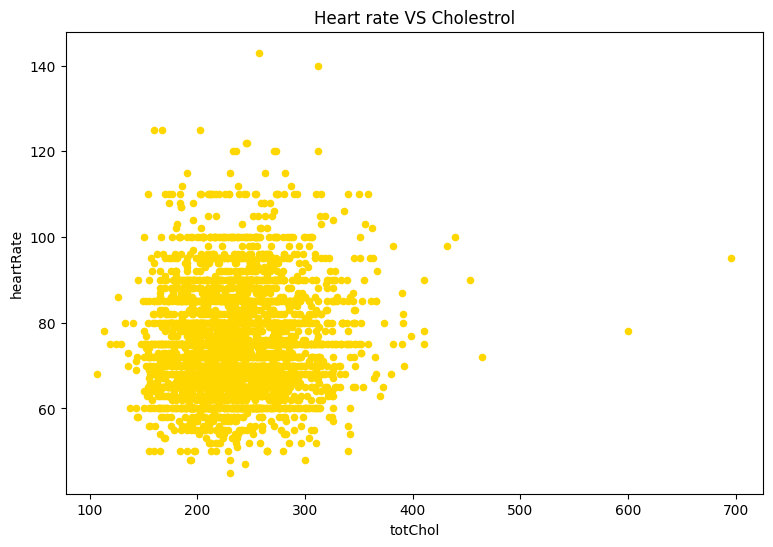

In [29]:
#Chart 11 - visualization code

#High chol leads to high heart rate?

plt.figure(figsize=(6,5))
dataset.plot(kind="scatter", x="totChol",y="heartRate",title="Heart rate VS Cholestrol",figsize=(9,6), color = 'gold')
plt.show()

 1. Why did you pick the specific chart?

We have used scatter plot here to check whether one continuous variable HeartRate is under the control of other continuous variable Cholestrol or not. Are they dependent or not.

2. What is/are the insight(s) found from the chart?

We can see that there is moderately lineary relationship between the above two features. But the outliers here makes clearly sure that high cholestrol can cause high heart rate.

3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can be useful as the patients having high cholestrol should be tested for heart rate too. This can increase sales of heart rate and cholestrol tests and can profit the business. Also as early as we can detect hig risk of CHD the better the life of patient.

###Chart 12: Correlation Plot

<Axes: >

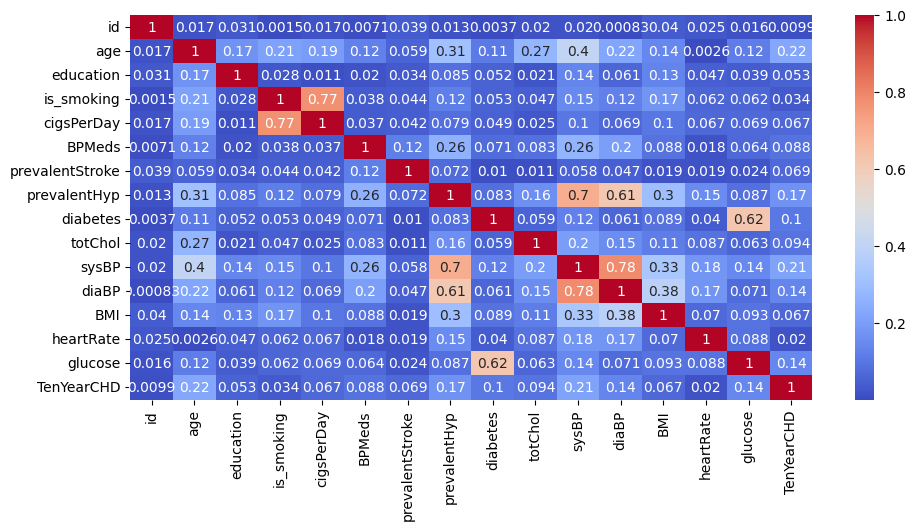

In [30]:
#Chart 12 - visualization code

corr = dataset.corr()
plt.figure(figsize=(11,5))
sns.heatmap(abs(corr), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

A correlation map is kind of a matrix which shows the dependency of each variable on every other variables. This table has correlation coefficients which shows the correlation between two variables.
The value of correlation lies between -1 and 1. Where 1 shows the maximum correlaion possible and -1 the least. This map is used to summarize data and with the help of it we can select/deselect features according to need. 


##### 2. What is/are the insight(s) found from the chart?

From the above correlation map we can observe that:-
1. is_smoking and ciggPerDay are highly correlated. This is obvious too as id a person smokes then the number of ciggs will not be zero for a day. Hence both the values have some correlation among them.
2. sysBP and diaBP are both correlated with Prevalent hypertension. This can be accounted by the fact that if one is a patient of hypertension then their BP will not behave normal. There will be fluctuations because of hypertension.

3. DiaBP and sysBP are also correlated as according to medical science there eexists a linear relationship between sysBP and diaBP. Theor combined fluctuations results in hhigh BP or low BP. That is why they are correlated.

###Chart 13: Pair Plot

In [ ]:
#Chart 13 - visualization code
sns.pairplot(dataset, hue="TenYearCHD")

##### 1. Why did you pick the specific chart?

A pair plot expresses the important features to explain the relationship between the two variables. It helps to form very simple classififcation models by making simple graphs and showing linear separation in data. Therefore, we used a pair plot to check out the patterns, relations and variations between the features of our dataset.
 It is somewhat same as correlation but it shows pictorially whereas correlation map shows the difference numerically.

##### 2. What is/are the insight(s) found from the chart?

The above chart clearly shows that there is very less linear relationship between continuous variables and datapoints. The categorical variables mostly all show the same trend. The varibles glucose, prevalent Strokeand diabetes have very high positive skewness. Most of the continuous data is clustered.

## ***5. Feature Engineering & Data Pre-processing***

In [ ]:
# Boxplot for all columns
plt.figure(figsize=(20,6))
sns.boxplot(data=dataset)
     

Handling Null/Missing values

In [ ]:
# Creating a function to fill null values of categorical columns with mode
def mode_fillna(df , columns):
  ''' Null values of categorical columns are filled with the mode of the column'''
  for column in columns:
    df[column] = df[column].fillna(df[column].mode()[0])
     

# Applying the function to fill null values of the column with mode
mode_fillna(df = dataset, columns = ['education','BPMeds'])
#As the columns 'cigsPerDay', 'totChol','BMI','heartRate' and 'glucose' are continous in nature and also these columns have outliers, median will be useful to fill the null values.
# Creating a function to fill null values of continous columns with median
def median_fillna(df, columns):
  ''' Null values of continous columns are filled with the median of the column '''
  for column in columns:
    df[column] = df[column].fillna(df[column].median())
     

# Applying the function to fill null values of continous columns with the median
median_fillna(df = dataset, columns = ['cigsPerDay','totChol','BMI','heartRate','glucose'])
     

# Checking for null values after treating the null values
dataset.isna().sum()
     

Handling Outliers

In [ ]:
# Function which returns columns with risk of outlier removal
def outlier_cal(columns):
  ''' Returns a dataframe showing risk of removal of outliers'''
  outlier_df = pd.DataFrame(columns=['Column', 'Upper Limit', 'Lower Limit', 'Upper Removal', 'Lower Removal', '% of Risk'])
  
  for column in columns:
    q3 = dataset[column].quantile(0.75)
    q1 = dataset[column].quantile(0.25)
    iqr = q3 - q1
    ul = q3 + (1.5* iqr)
    ll = q1 - (1.5* iqr)
  
    upper_removal = dict(dataset[dataset[column] > ul]['TenYearCHD'].value_counts())
    lower_removal = dict(dataset[dataset[column] < ll]['TenYearCHD'].value_counts())

    input_dict = {'Column' : column,
                  'Upper Limit' : ul,
                  'Lower Limit' : ll,
                  'Upper Removal' : upper_removal,
                  'Lower Removal' : lower_removal,
                  '% of Risk' : upper_removal[1]*100/len(dataset[dataset[column] > ul])}

    outlier_df = outlier_df.append(input_dict, ignore_index = True)

  return outlier_df
     

In [ ]:
# Applying the function created
outlier_cal(['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'])

Categorical Encoding

In [ ]:
# Creating dummy variables for 'sex'
dataset = pd.get_dummies(dataset , columns = ['sex'])

Feature Manipulation

 Researching more on heart diseases, I have found that pulse pressure, which is the difference between systolic and diastolic BP has a large impact on CHD. Hence we can add PP (pulse pressure) which will carry values of both systolic and diastolic BP in one column.

In [ ]:
# Adding pulse pressure as a column
dataset['pulsePressure'] = dataset['sysBP'] - dataset['diaBP']

# Dropping the systolic and diastolic BP columns
dataset.drop(['sysBP','diaBP'], axis = 1, inplace = True)

In [ ]:
# Dropping the 'is_smoking' and BMI_cat column
dataset.drop(['is_smoking','BMI_cat'], axis = 1, inplace = True)

Handling Class Imbalance

There exists a clear imbalance in the classes. Hence, we will use SMOTE to oversample the classes which are in less number.

In [ ]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE
     

# Creating an instance for SMOTE
smote = SMOTE()
     

# Dividing data into independent (X) and dependent (y) variables
independent_variables = ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose', 'pulsePressure', 'sex_F', 'sex_M']
dependent_variable = 'TenYearCHD'
X = dataset.loc[:, independent_variables]
y = dataset[dependent_variable]
     

# The rows and columns of X and y
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns')
print(f'y has {y.shape[0]} rows')
     

# Using SMOTE to oversample
X,y = smote.fit_resample(X,y)
# Rows in the dataset after oversampling
print(f'Number of rows in X is {len(X)}')
print(f'Number of rows in y is {len(y)}')

Scaling the data

Now both the classes are of equal size and the predictions will not be biased.
The numbers in the data have different ranges, hence, we will scale the data using the Min Max Scaler


In [ ]:
# Importing Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
     

# Creating an instance for Min Max Scaler
scaler = MinMaxScaler()
     

# Scaling the independent variables
X = scaler.fit_transform(X)
     

Splitting the data

In [ ]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## ***5. ML Model Implementation***

In [ ]:
# Building the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting the outcomes
y_pred = model.predict(X_test)

# Measuring the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:

# Step 6
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7
knn = KNeighborsClassifier()

# Step 8
knn.fit(X_train, y_train)

# Step 9
y_pred = knn.predict(X_test)

# Step 10
print(classification_report(y_test, y_pred))


In [ ]:
     

# Creating a dictionary for models
models = {'Logistic Regression' : LogisticRegression(),
              'Random Forest' : RandomForestClassifier(),
              'XGB Classifier' : XGBClassifier(),
              'KNN' : KNeighborsClassifier(),
              'SVC' : SVC(probability=True)}
     

# Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
     


In [ ]:
# Creating a function for model building
def model_build(X_train, y_train, X_test, y_test, model_dict):
  ''' Returns a dataframe with model name and accuracy scores, train confusion matrix, test confusion matrix and the values 
  for the roc curve '''
  
  # Creating a dataframe
  model_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC'])
  
  # Creating necessary dictionaries
  train_confusion_matrix = {}  
  test_confusion_matrix = {}  
  curve = {}
  
  
  # Model building
  for n, m in model_dict.items():
    model = m
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    test_probs = model.predict_proba(X_test)
    test_probs = test_probs[:,1]

    # Evaluation
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)
 # Updating the dataframe for each iteration
    model_df = model_df.append({'Model': n,
                               'Train Accuracy' : train_accuracy,
                               'Test Accuracy': test_accuracy,
                               'Train Precision' : train_precision,
                               'Test Precision' : test_precision,
                               'Train Recall' : train_recall,
                               'Test Recall' : test_recall,
                               'Train ROC AUC' : train_roc_auc,
                               'Test ROC AUC' : test_roc_auc}, ignore_index = True)
    
    # Updating the dictionary for each iteration
    train_confusion_matrix[n] = confusion_matrix(y_train, train_preds)
    test_confusion_matrix[n] = confusion_matrix(y_test, test_preds)

    # ROC Curve values
    fpr, tpr, _ = roc_curve(y_test, test_probs)
    curve[n] = (fpr,tpr)

    

  return model_df, train_confusion_matrix, test_confusion_matrix, curve
     

# Using the model function to understand the scores of different models
model_table, train_cm, test_cm, curve= model_build(X_train, y_train, X_test, y_test, models)
     

# Models and their scores
model_table

In [ ]:
# Train confusion matrix
for name, matrix in train_cm.items():
  print(f'Model : {name}')
  print(matrix)
  print('**'*10)

In [ ]:
# Plotting ROC Curve for all the models
plt.figure(figsize=(15,6))
for name, value in curve.items():
  sns.lineplot(x = value[0], y = value[1], label = name)
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

 Hyperparameter Tuning
From the model building section we can understand the best models are Random Forest and XGB Classifier. Between these two, Random Forest is overfitting to some extent compared to other models. XGB Classifier is the second best performer, hence this will be chosen for hyperparameter tuning.

In [ ]:


# Creating a function for hyperparameter tuning
def grid_fitting(name, hyperparams, estim):
  '''Returns a dataframe with scores of the model post hyperparameter tuning along with best model and confusion matrix for train and test '''
  
  grid_df = pd.DataFrame(columns = ['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC'])

  grid = GridSearchCV(estimator= estim, param_grid = hyperparams, cv = 5, scoring = 'recall')

  grid.fit(X_train,y_train)

  best_model = grid.best_estimator_

  train_grid = best_model.predict(X_train)
  test_grid = best_model.predict(X_test)

  grid_train_accuracy = accuracy_score(y_train, train_grid)
  grid_test_accuracy = accuracy_score(y_test, test_grid)
  grid_train_precision = precision_score(y_train, train_grid)
  grid_test_precision = precision_score(y_test, test_grid)
  grid_train_recall = recall_score(y_train, train_grid)
  grid_test_recall = recall_score(y_test, test_grid)
  grid_train_roc_auc = roc_auc_score(y_train, train_grid)
  grid_test_roc_auc = roc_auc_score(y_test, test_grid)
   
  grid_df = grid_df.append({'Model': name,
                           'Train Accuracy' : grid_train_accuracy,
                           'Test Accuracy': grid_test_accuracy,
                           'Train Precision' : grid_train_precision,
                           'Test Precision' : grid_test_precision,
                           'Train Recall' : grid_train_recall,
                           'Test Recall' : grid_test_recall,
                           'Train ROC AUC' : grid_train_roc_auc,
                           'Test ROC AUC' : grid_test_roc_auc},
                           ignore_index = True)
  
  grid_train_cm = confusion_matrix(y_train, train_grid)
  grid_test_cm = confusion_matrix(y_test, test_grid)


  return best_model, grid_df, grid_train_cm, grid_test_cm
      


In [ ]:
# Hyperparameter dictionary
xgb_param_dict ={'n_estimators' : [300,350],
                'max_depth': [7,8,9],
                'learning_rate': [0.01, 0.001]}

In [ ]:
# Apply the function to tune the parameters
xgb_best_model, xgb_df, xgb_grid_train_cm, xgb_grid_test_cm = grid_fitting('XGB', xgb_param_dict, XGBClassifier())
     

# The best estimators of the model
xgb_best_model
# Dataframe showing scores of the model after hyperparameter tuning
xgb_df
     

In [ ]:
# Confusion matrix of training data after hyperparameter tuning
xgb_grid_train_cm

In [ ]:
# Confusion matrix of test data after hyperparameter tuning
xgb_grid_test_cm
     